# Lab N
### Morphology

Skimage morphology operators' documentation:
https://scikit-image.org/docs/dev/api/skimage.morphology.html

In [13]:
from commonfunctions import *
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.morphology import binary_erosion, binary_dilation, binary_closing,skeletonize, thin
from skimage.measure import find_contours
from skimage.draw import rectangle

# Show the figures / plots inside the notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


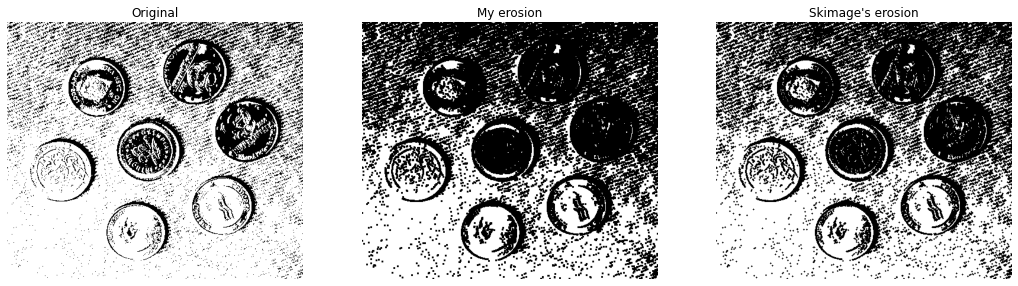

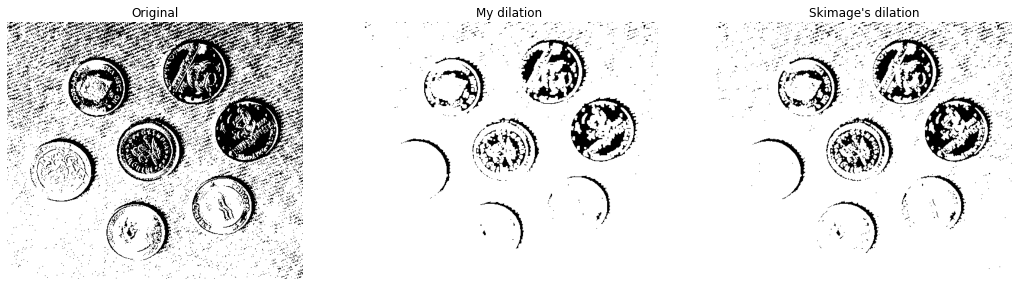

In [14]:
'''
1) Erosion / Dilation:
    - Load "coins.jpg" from the img folder
    - Convert the image to binary
    - Write 2 functions each applying 1 of the erosion/dilation algorithms (with adjustable square window size) manually to the binary image
    - Use Skimage's "binary_erosion" & "binary_dilation" & show the results
'''
# se = SE if SE else np.ones((size,size))
    # color_array=np.array((size,size))
    # new_img=np.copy(img)
    # for i in range (0,img.shape[0]):
    #     for j in range (0,img.shape[1]):
    #         color_array=img[i:i+1 ,j:j+1]
    #         new_img[i][j]=1 if (np.logical_and(color_array, se) == se).all() else 0
    # return  new_img 

def binary(img,threshold):
    img=np.where(img>threshold,1,0)
    return img

def erosion(img,size1,size2,SE=None):
    
     
    
    original = img.copy()
    
    eroded = np.zeros(img.shape)
    
    se = SE if SE else np.ones((size1, size2))
    
   

    start1 = int(size1 / 2)
    start2 = int(size2 / 2)
    # new size after padding
    newC = original.shape[1]+ 2 * size2
    newR = original.shape[0]+ 2 * size1
    
    img = np.ones((newR, newC))
    
    
    img[start1:start1+original.shape[0], start2:start2+original.shape[1]] = original
    
    for i in range(start1, original.shape[0] + start1):
        for j in range(start2, original.shape[1] + start2):
            I = i - start1
            J = j - start2
            mat = img[I: I + size1, J: J + size2]
            eroded[I][J] = 1 if (np.logical_and(mat, se) == se).all() else 0
            
    return eroded

def dilation(img, size1,size2, SE=None):
   
        original = img.copy()
        
        dilated = np.zeros(img.shape)
        
        se = SE if SE else np.ones((size1,size2))
       
        
            
        start1 = int(size1 / 2)
        start2 = int(size2 / 2)
       #padding
        newC = original.shape[1]+ 2 * size2
        newR = original.shape[0]+ 2 * size1
        
    #paddingn with zero
        img = np.zeros((newR, newC))

        
        img[start1:start1+original.shape[0], start2:start2+original.shape[1]] = original
        
        
        for i in range(start1, original.shape[0] + start1):
            for j in range(start2, original.shape[1] + start2):
                I = i - start1
                J = j - start2
                mat = img[I: I + size1, J: J + size2]
                dilated[I][J] = 1 if (np.logical_and(mat, se)).any() else 0
        return dilated     

    

img = binary(rgb2gray(io.imread('img/coins.jpg')),0.5)


eroded = erosion(img, 3,3)
dilated = dilation(img, 3,3)
#ersion like min more dark
show_images([img, eroded, binary_erosion(img)], ["Original","My erosion","Skimage's erosion"]) 
#dilation like max more bright
show_images([img, dilated, binary_dilation(img)], ["Original","My dilation","Skimage's dilation"]) 



(470, 600)


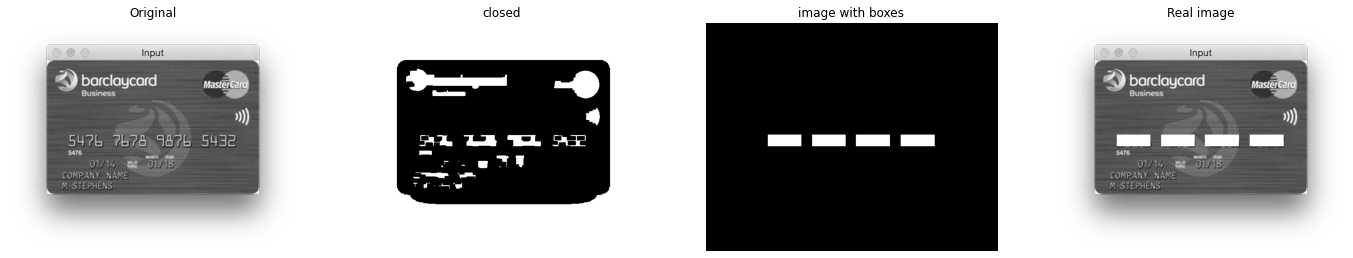

In [15]:
'''
2) Case Study: Credit Card Number Extraction
    - Load "card.jpg" from the img folder
    - Convert the image to binary by brightness thresholding maintaining the card number details for extraction
    - Use your erosion/dilation functions, or Skimage's functions only if you didn't implement them, to apply closing
        Note: The goal of this step is to join the card number into 4 sets of connected pixels
    - Use Skimage's "find_contours" to get the bounding boxes for the credit card's numbers by filtering on aspect ratio (between 2.5 & 3.5)
        Note: When using "find_contours(img, 0.8)" the o/p is a list of contours each having:
                - contour[:,0] being the Y values of the contour perimeter points
                - contour[:,1] being the X values of the contour perimeter points
'''
#closing is dilation then ersion 
def closing(img):
    #Convert the image to binary by brightness thresholding 
    img=np.where(img>0.65,1,0)
    #less than or equal height or width
    return erosion(dilation(img,7,12 ), 7,12)


img = rgb2gray(io.imread('img/card.jpg'))
print(img.shape)
closed = closing(img)

#Use Skimage's "find_contours"
array = find_contours(closed, 0.8)
img_with_boxes = np.copy(closed)
bounding_boxes = []
for contour in array:
      # y = i[:, 0] height
      # x = i[:, 1] width
    box = [int(min(contour[:, 1])), int(max(contour[:, 1])), int(min(contour[:, 0])),int( max(contour[:, 0]))]
    aspect_ratio = (box[1]-box[0])/float(box[3]-box[2])
    if aspect_ratio > 2.5 and aspect_ratio < 3.5:
        # bounding_boxes.append(box)
        h = box[3]-box[2]
        if h > 12:
            bounding_boxes.append(box)
  #to make all the image black  
real_image=np.copy(img)         
img_with_boxes = np.zeros(img.shape)            

for box in bounding_boxes:
    [Xmin, Xmax, Ymin, Ymax] = box
    rr, cc = rectangle(start = (Ymin,Xmin), end = (Ymax,Xmax), shape=img_with_boxes.shape)
    img_with_boxes[rr, cc] = 1 #set color white
    real_image[rr, cc] = 1

show_images([img, closed, img_with_boxes,real_image], ["Original", "closed", "image with boxes","Real image"])


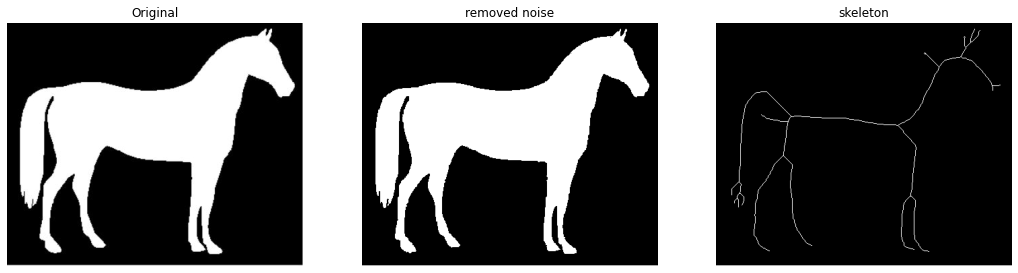

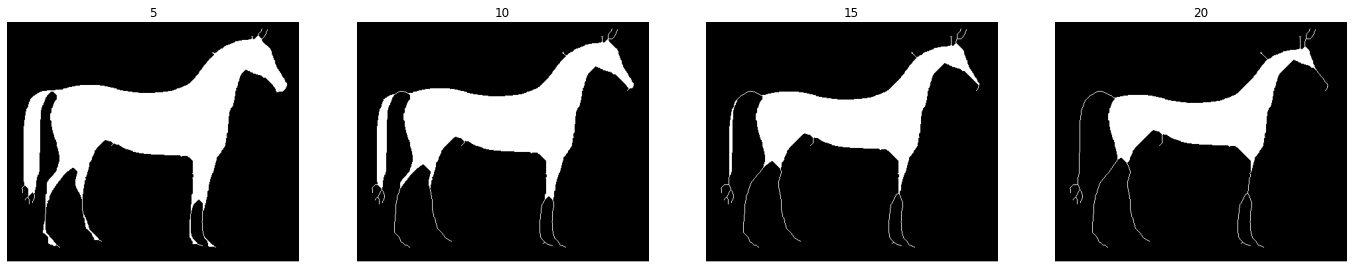

In [16]:
'''
3) Skeletonization:
    - Load "horse.jpg" from the img folder 
    - Use a binary threshold of 0.9 to remove invisible noise in the background
    - Use Skimage's "skeletonize(image)" to acquire the image's skeleton & show it
    - Use Skimage's "thin(image, max_iter)" with values of max_iter 5/10/15/20 & show it
'''
def Skeletonization(img):
    original = img.copy()
    img=np.where(img>0.9,1,0)
    show_images([original, img, skeletonize(img)], ["Original", "removed noise", "skeleton"])
    show_images([thin(img, 5),thin(img, 10),thin(img, 15),thin(img, 20)], ["5","10","15","20"])
    
horse=rgb2gray(io.imread('img\horse.jpg'))
Skeletonization(horse)

